# Accuracy and Time

In [2]:
from glob import glob
import json
import pandas as pd

files = glob('./output/experiments_layer_development_investigation/*.json')

all_dicts = []

for file in files:
    with open(file, "r") as f:
        data = json.load(f)
        all_dicts.append(data)

df = pd.DataFrame(all_dicts)
original_df = df.copy()

df["average_training_time_per_epoch"] = df["time"] / df["epochs"]

df = df[(df["beta"] > 0.5) & (df["threshold"] < 3)]

(df.sort_values("test_accuracy"))[["epochs", "test_accuracy", "sparsity", "beta", "threshold", "average_training_time_per_epoch"]]

,epochs,test_accuracy,sparsity,beta,threshold,average_training_time_per_epoch
13,18,61.307420,0.70,0.80,1.0,451.502144
6,11,65.768551,0.95,0.99,1.0,480.123850
17,24,65.945230,0.20,0.80,1.0,445.112726
12,14,66.431095,0.20,0.99,0.7,481.466569
5,16,66.872792,0.00,0.80,1.0,456.261053
3,16,67.093640,0.00,0.99,0.7,483.753261
4,5,68.595406,0.95,0.99,0.7,519.186317
9,27,70.008834,0.95,0.80,1.0,442.441823
7,21,70.362191,0.70,0.80,0.7,453.213798
19,25,70.715548,0.95,0.80,0.7,451.690889


# Layer Development

In [3]:
import torch
from util.utils import get_device
from torch.utils.data import DataLoader
from tonic import datasets, transforms
from constants import TIME_STEPS

selection_index = 2
device = get_device()

frame_transform = transforms.ToFrame(
    sensor_size=datasets.SHD.sensor_size,  
    n_time_bins=TIME_STEPS
)

test_data = datasets.SHD("./data", transform=frame_transform, train=False)

test_data_loader = DataLoader(test_data, shuffle=False, batch_size=32)

data, target = list(test_data_loader)[0]
data = data.to_dense().to(torch.float32).squeeze().permute(1, 0, 2).to(device)

x_selected = data[:, selection_index, :]
y_selected = target[selection_index]


/home/mark/anaconda3/envs/whk-snn/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


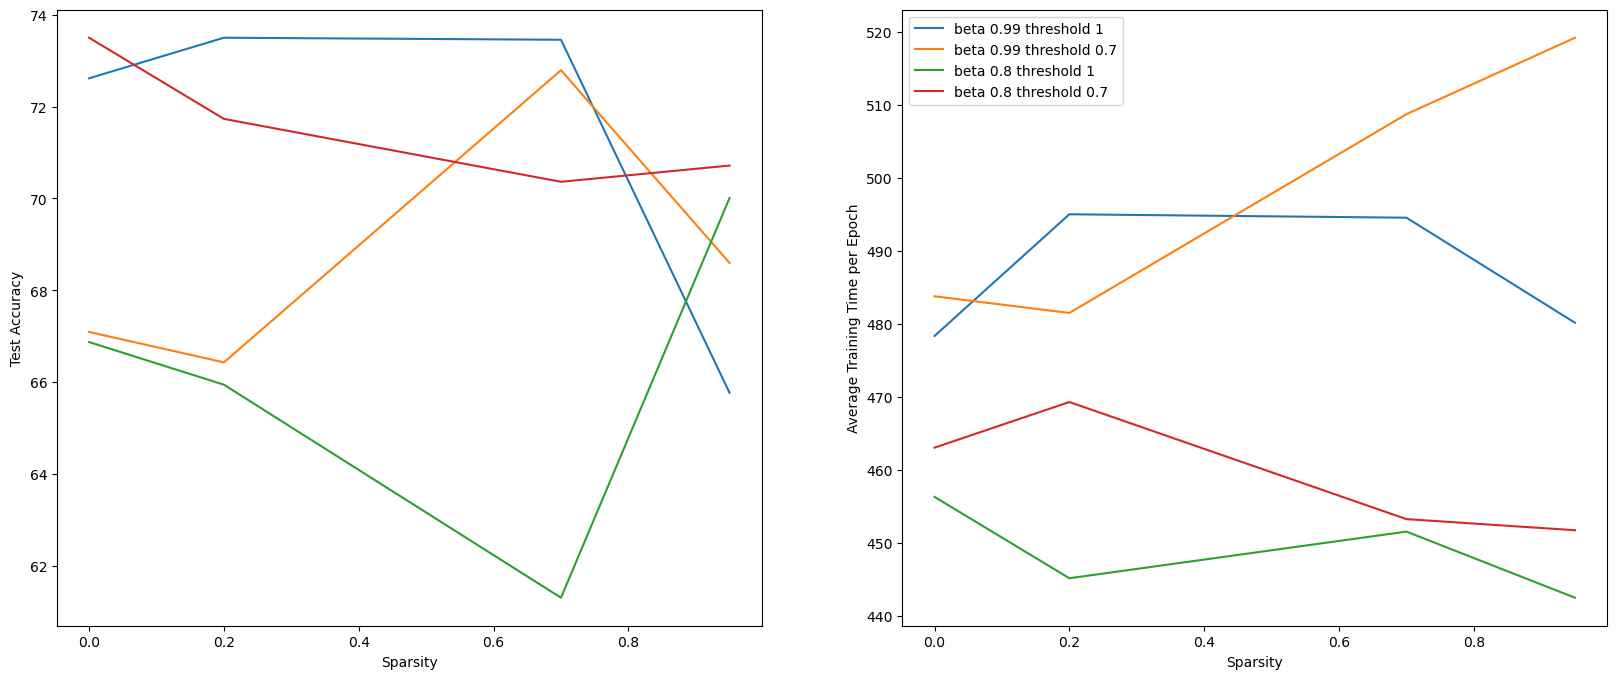

In [4]:
import matplotlib.pyplot as plt

beta_099_threshold_1 = df[(df["beta"] == 0.99) & (df["threshold"] == 1)].sort_values("sparsity")
sparsity_beta_099_threshold_1 = beta_099_threshold_1["sparsity"].to_numpy()

test_accuracy_beta_099_threshold_1 = beta_099_threshold_1["test_accuracy"].to_numpy()
average_training_time_per_epoch_beta_099_threshold_1 = beta_099_threshold_1["average_training_time_per_epoch"].to_numpy()

beta_099_threshold_07 = df[(df["beta"] == 0.99) & (df["threshold"] == 0.7)].sort_values("sparsity")
sparsity_beta_099_threshold_07 = beta_099_threshold_07["sparsity"].to_numpy()

test_accuracy_beta_099_threshold_07 = beta_099_threshold_07["test_accuracy"].to_numpy()
average_training_time_per_epoch_beta_099_threshold_07 = beta_099_threshold_07["average_training_time_per_epoch"].to_numpy()

beta_08_threshold_1 = df[(df["beta"] == 0.8) & (df["threshold"] == 1)].sort_values("sparsity")
sparsity_beta_08_threshold_1 = beta_08_threshold_1["sparsity"].to_numpy()

test_accuracy_beta_08_threshold_1 = beta_08_threshold_1["test_accuracy"].to_numpy()
average_training_time_per_epoch_beta_08_threshold_1 = beta_08_threshold_1["average_training_time_per_epoch"].to_numpy()

beta_08_threshold_07 = df[(df["beta"] == 0.8) & (df["threshold"] == 0.7)].sort_values("sparsity")
sparsity_beta_08_threshold_07 = beta_08_threshold_07["sparsity"].to_numpy()

test_accuracy_beta_08_threshold_07 = beta_08_threshold_07["test_accuracy"].to_numpy()
average_training_time_per_epoch_beta_08_threshold_07 = beta_08_threshold_07["average_training_time_per_epoch"].to_numpy()

fig, axs = plt.subplots(ncols = 2, nrows=1, figsize=(20, 8))

axs[0].plot(sparsity_beta_099_threshold_1, test_accuracy_beta_099_threshold_1, label="beta 0.99 threshold 1")
axs[0].plot(sparsity_beta_099_threshold_07, test_accuracy_beta_099_threshold_07, label="beta 0.99 threshold 0.7")
axs[0].plot(sparsity_beta_08_threshold_1, test_accuracy_beta_08_threshold_1, label="beta 0.8  threshold 1")
axs[0].plot(sparsity_beta_08_threshold_07, test_accuracy_beta_08_threshold_07, label="beta 0.8  threshold 0.7")
axs[0].set_ylabel("Test Accuracy")
axs[0].set_xlabel("Sparsity")

axs[1].plot(sparsity_beta_099_threshold_1, average_training_time_per_epoch_beta_099_threshold_1, label="beta 0.99 threshold 1")
axs[1].plot(sparsity_beta_099_threshold_07, average_training_time_per_epoch_beta_099_threshold_07, label="beta 0.99 threshold 0.7")
axs[1].plot(sparsity_beta_08_threshold_1, average_training_time_per_epoch_beta_08_threshold_1, label="beta 0.8 threshold 1")
axs[1].plot(sparsity_beta_08_threshold_1, average_training_time_per_epoch_beta_08_threshold_07, label="beta 0.8 threshold 0.7")
axs[1].set_ylabel("Average Training Time per Epoch")
axs[1].set_xlabel("Sparsity")

plt.legend()
plt.show()

# Findings

- beta = 0.8 seems to lead to lower training time
- beta = 0.8 seems to increase the test accuracy at higher sparsity levels

In [5]:
selection_index = 2
device = get_device()

frame_transform = transforms.ToFrame(
    sensor_size=datasets.SHD.sensor_size,  
    n_time_bins=TIME_STEPS
)

test_data = datasets.SHD("./data", transform=frame_transform, train=False)

test_data_loader = DataLoader(test_data, shuffle=False, batch_size=32)

data, target = list(test_data_loader)[0]
data = data.to_dense().to(torch.float32).squeeze().permute(1, 0, 2).to(device)

x_selected = data[:, selection_index, :]
y_selected = target[selection_index]


In [6]:
def build_model_path(sparsity, beta, threshold):
    sparsity = '0' if sparsity == 0 else sparsity
    threshold = '1' if threshold == 1 else threshold
    return f'./models/experiment_layer_development_investigation/best_grid_search_sparsity_{sparsity}_beta_{beta}_threshold_{threshold}.pth'


./models/experiment_layer_development_investigation/best_grid_search_sparsity_0_beta_0.99_threshold_1.pth
sparsity: 0.0 | observed zero weights = 0.00
./models/experiment_layer_development_investigation/best_grid_search_sparsity_0.2_beta_0.99_threshold_1.pth
sparsity: 0.2 | observed zero weights = 0.00
./models/experiment_layer_development_investigation/best_grid_search_sparsity_0.7_beta_0.99_threshold_1.pth
sparsity: 0.7 | observed zero weights = 0.00
./models/experiment_layer_development_investigation/best_grid_search_sparsity_0.95_beta_0.99_threshold_1.pth
sparsity: 0.95 | observed zero weights = 0.10


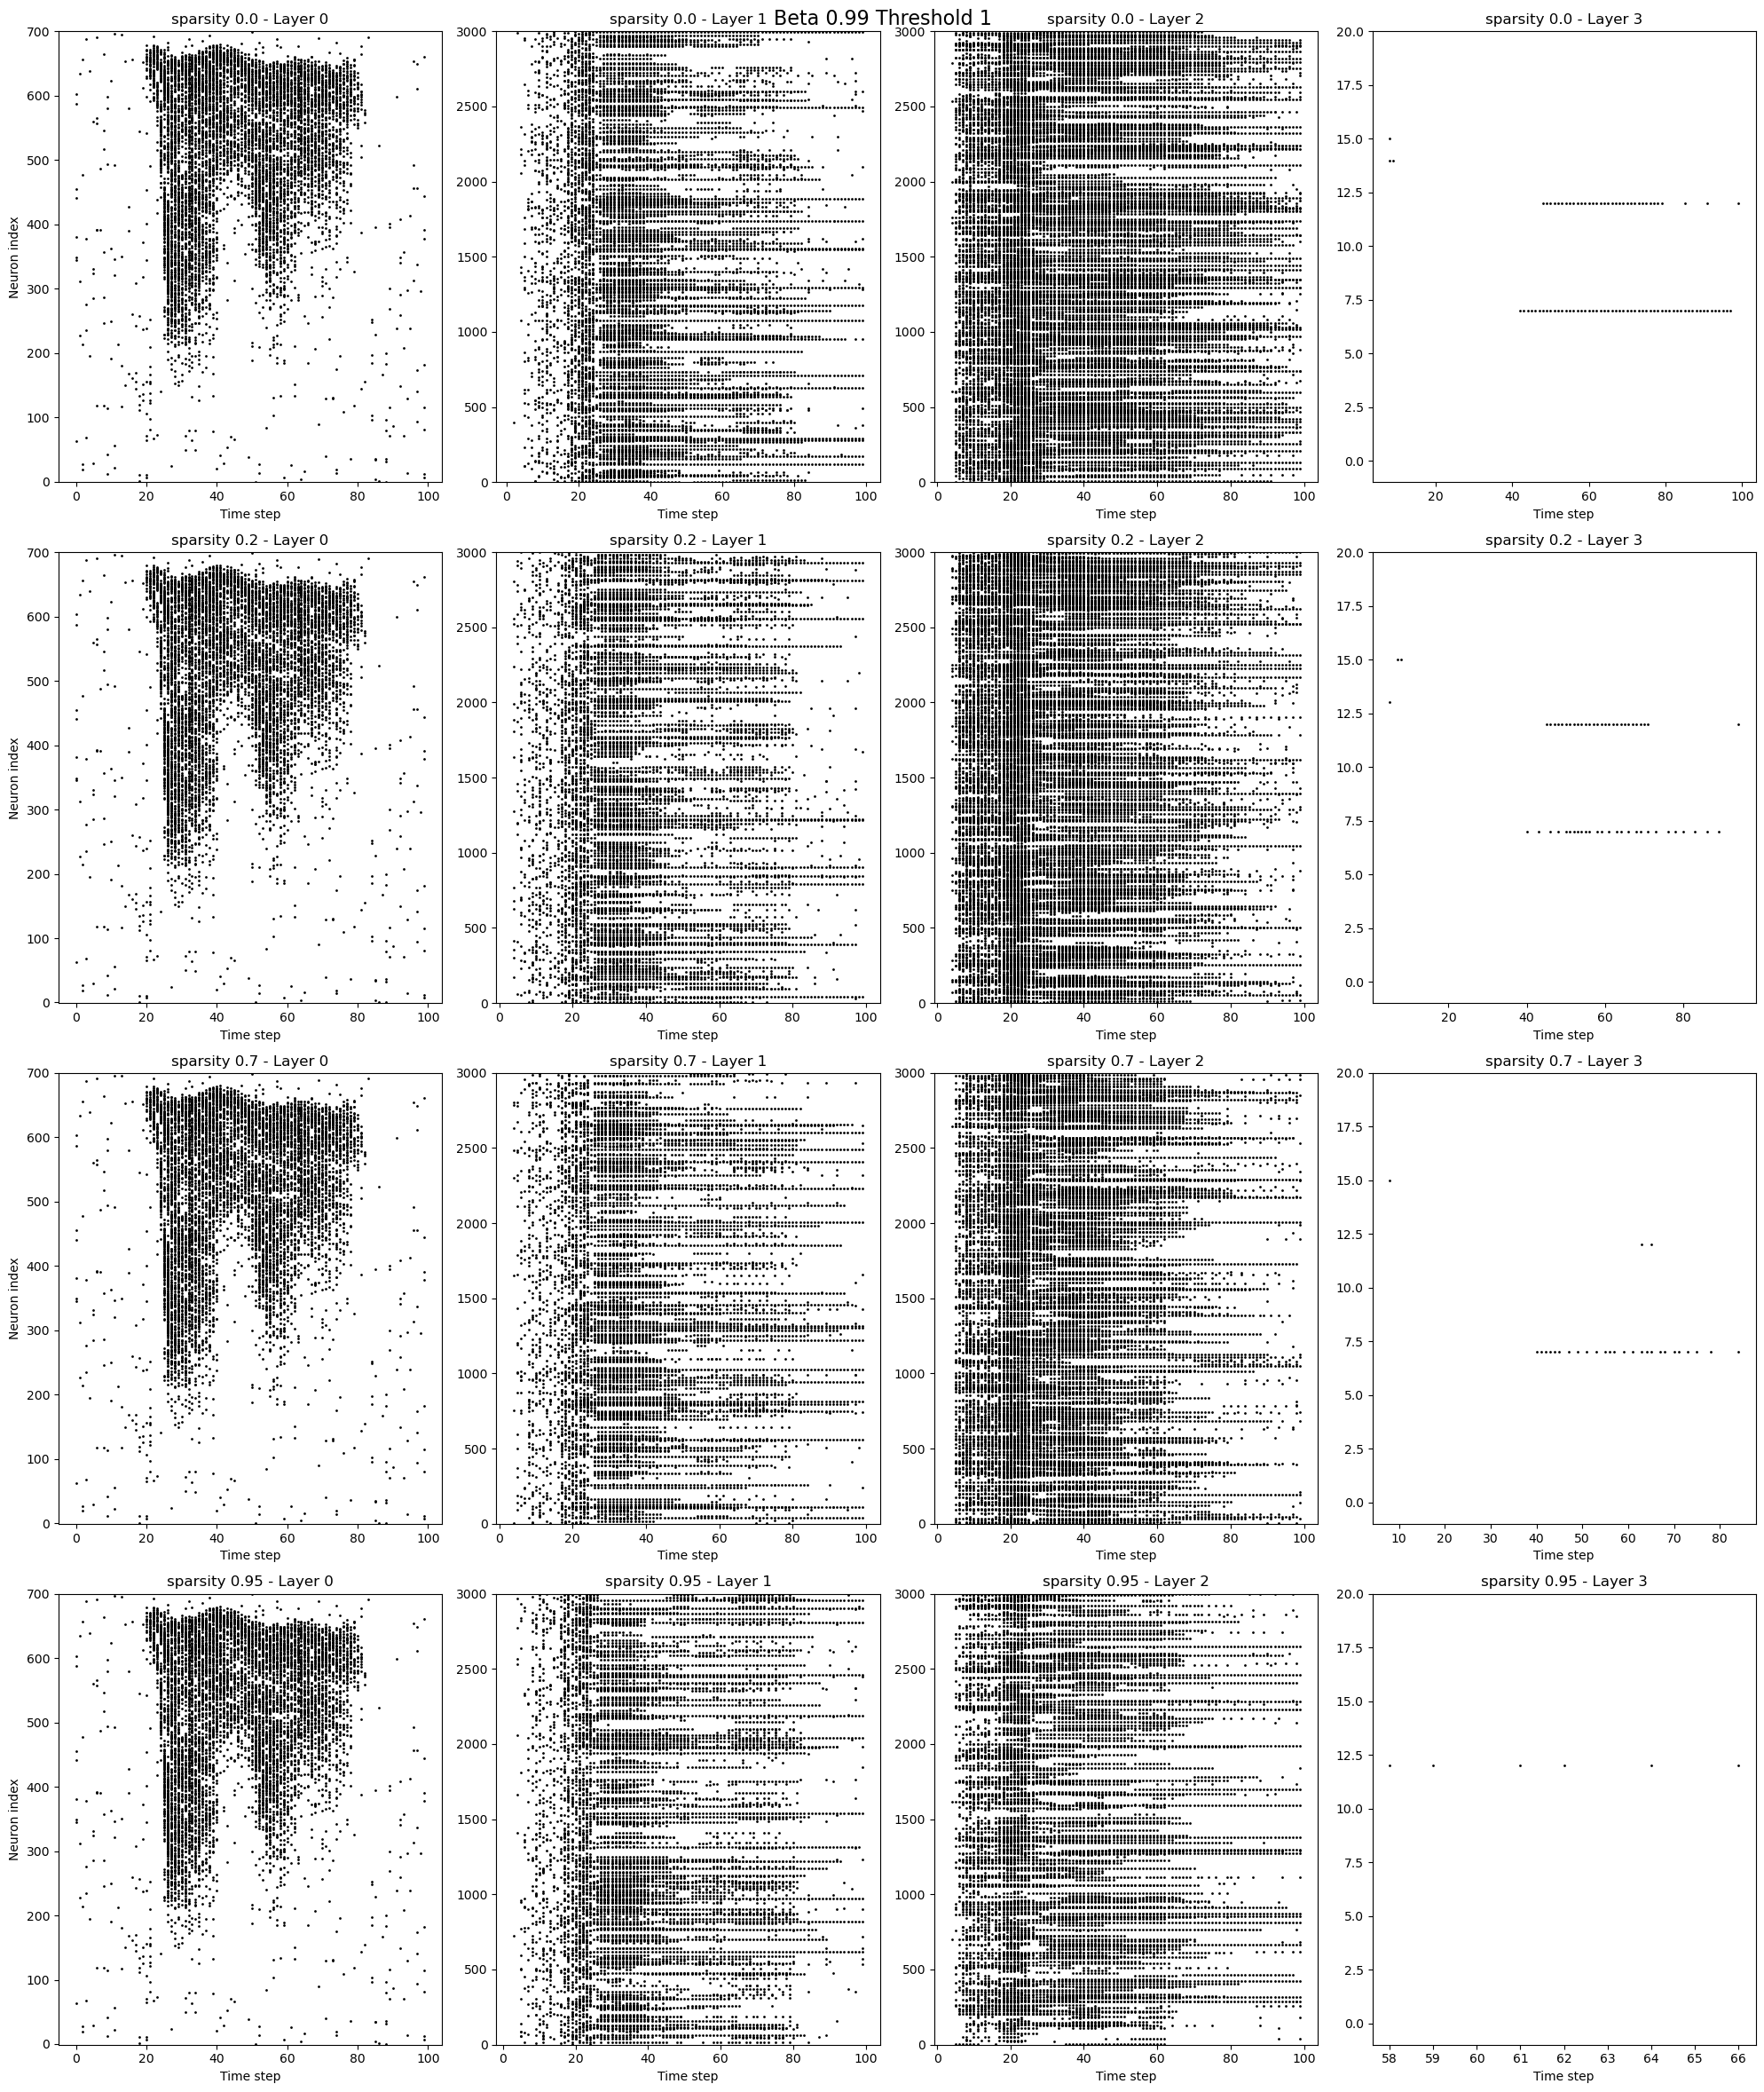

In [8]:
from neural_nets.configurable_spiking_neural_net import ConfigurableSpikingNeuralNet
from constants import NUMBER_INPUT_NEURONS, NUMBER_OUTPUT_NEURONS, TIME_STEPS
from util.plot_layer_development import plot_layer_development

import copy


def count_zero_weights(model):
    zero_count = 0
    total_params = 0
    for param in model.parameters():
        if param.requires_grad:
            zero_count += torch.sum(param == 0).item()
            total_params += param.numel()
    return zero_count, total_params

BEST_NUMBER_HIDDEN_NEURONS = 3000
BEST_NUMBER_HIDDEN_LAYER = 2

nets = []

for sparsity in beta_099_threshold_1["sparsity"]:
    beta = 0.99
    threshold = 1
    configured_net =  ConfigurableSpikingNeuralNet(number_input_neurons=NUMBER_INPUT_NEURONS,
                                                 number_hidden_neurons=BEST_NUMBER_HIDDEN_NEURONS,
                                                 number_output_neurons=NUMBER_OUTPUT_NEURONS,
                                                 beta=beta,
                                                 threshold=threshold,
                                                 time_steps=TIME_STEPS,
                                                 number_hidden_layers=BEST_NUMBER_HIDDEN_LAYER)
    
    model = copy.deepcopy(configured_net)
    model_path = build_model_path(sparsity, beta, threshold)
    print(model_path)
    model.load_state_dict(torch.load(model_path))
    zero_weights, total_count = count_zero_weights(model)
    print(f"sparsity: {sparsity} | observed zero weights = {(zero_weights / total_count):.2f}")
    nets.append((beta, threshold, sparsity, model))


models = [model for _,_,_, model in nets]

row_labels = [f'sparsity {sparsity}' for _, _, sparsity, _ in nets]

plot_layer_development(models, data, selection_index, row_labels, "Beta 0.99 Threshold 1")

In [7]:
beta_099_threshold_1

,epochs,training_accuracy,test_accuracy,time,num_hidden_layer,num_hidden_neurons,sparsity,beta,threshold,average_training_time_per_epoch
15,10,0.960152,70.053004,5234.016630,2,3000,0.00,0.99,1.0,523.401663
1,16,0.980383,73.056537,8881.551641,2,3000,0.20,0.99,1.0,555.096978
10,9,0.948259,71.731449,5189.395819,2,3000,0.70,0.99,1.0,576.599535
6,10,0.868195,65.326855,4784.253639,2,3000,0.95,0.99,1.0,478.425364


In [ ]:
from neural_nets.configurable_spiking_neural_net import ConfigurableSpikingNeuralNet
from constants import NUMBER_INPUT_NEURONS, NUMBER_OUTPUT_NEURONS, TIME_STEPS
from util.plot_layer_development import plot_layer_development

BEST_NUMBER_HIDDEN_NEURONS = 3000
BEST_NUMBER_HIDDEN_LAYER = 2

nets = []

for sparsity in beta_08_threshold_1["sparsity"]:
    beta = 0.8
    threshold = 1
    configured_net =  ConfigurableSpikingNeuralNet(number_input_neurons=NUMBER_INPUT_NEURONS,
                                                 number_hidden_neurons=BEST_NUMBER_HIDDEN_NEURONS,
                                                 number_output_neurons=NUMBER_OUTPUT_NEURONS,
                                                 beta=beta,
                                                 threshold=threshold,
                                                 time_steps=TIME_STEPS,
                                                 number_hidden_layers=BEST_NUMBER_HIDDEN_LAYER)
    
    configured_net.load_state_dict(torch.load(build_model_path(sparsity, beta, threshold)))
    nets.append((beta, threshold, sparsity, configured_net))


models = [model for _,_,_, model in nets]

row_labels = [f'sparsity {sparsity}' for _, _, sparsity, _ in nets]

plot_layer_development(models, data, selection_index, row_labels, "Beta 0.99 Threshold 1")

TypeError: plot_layer_development() got an unexpected keyword argument 'figsize'

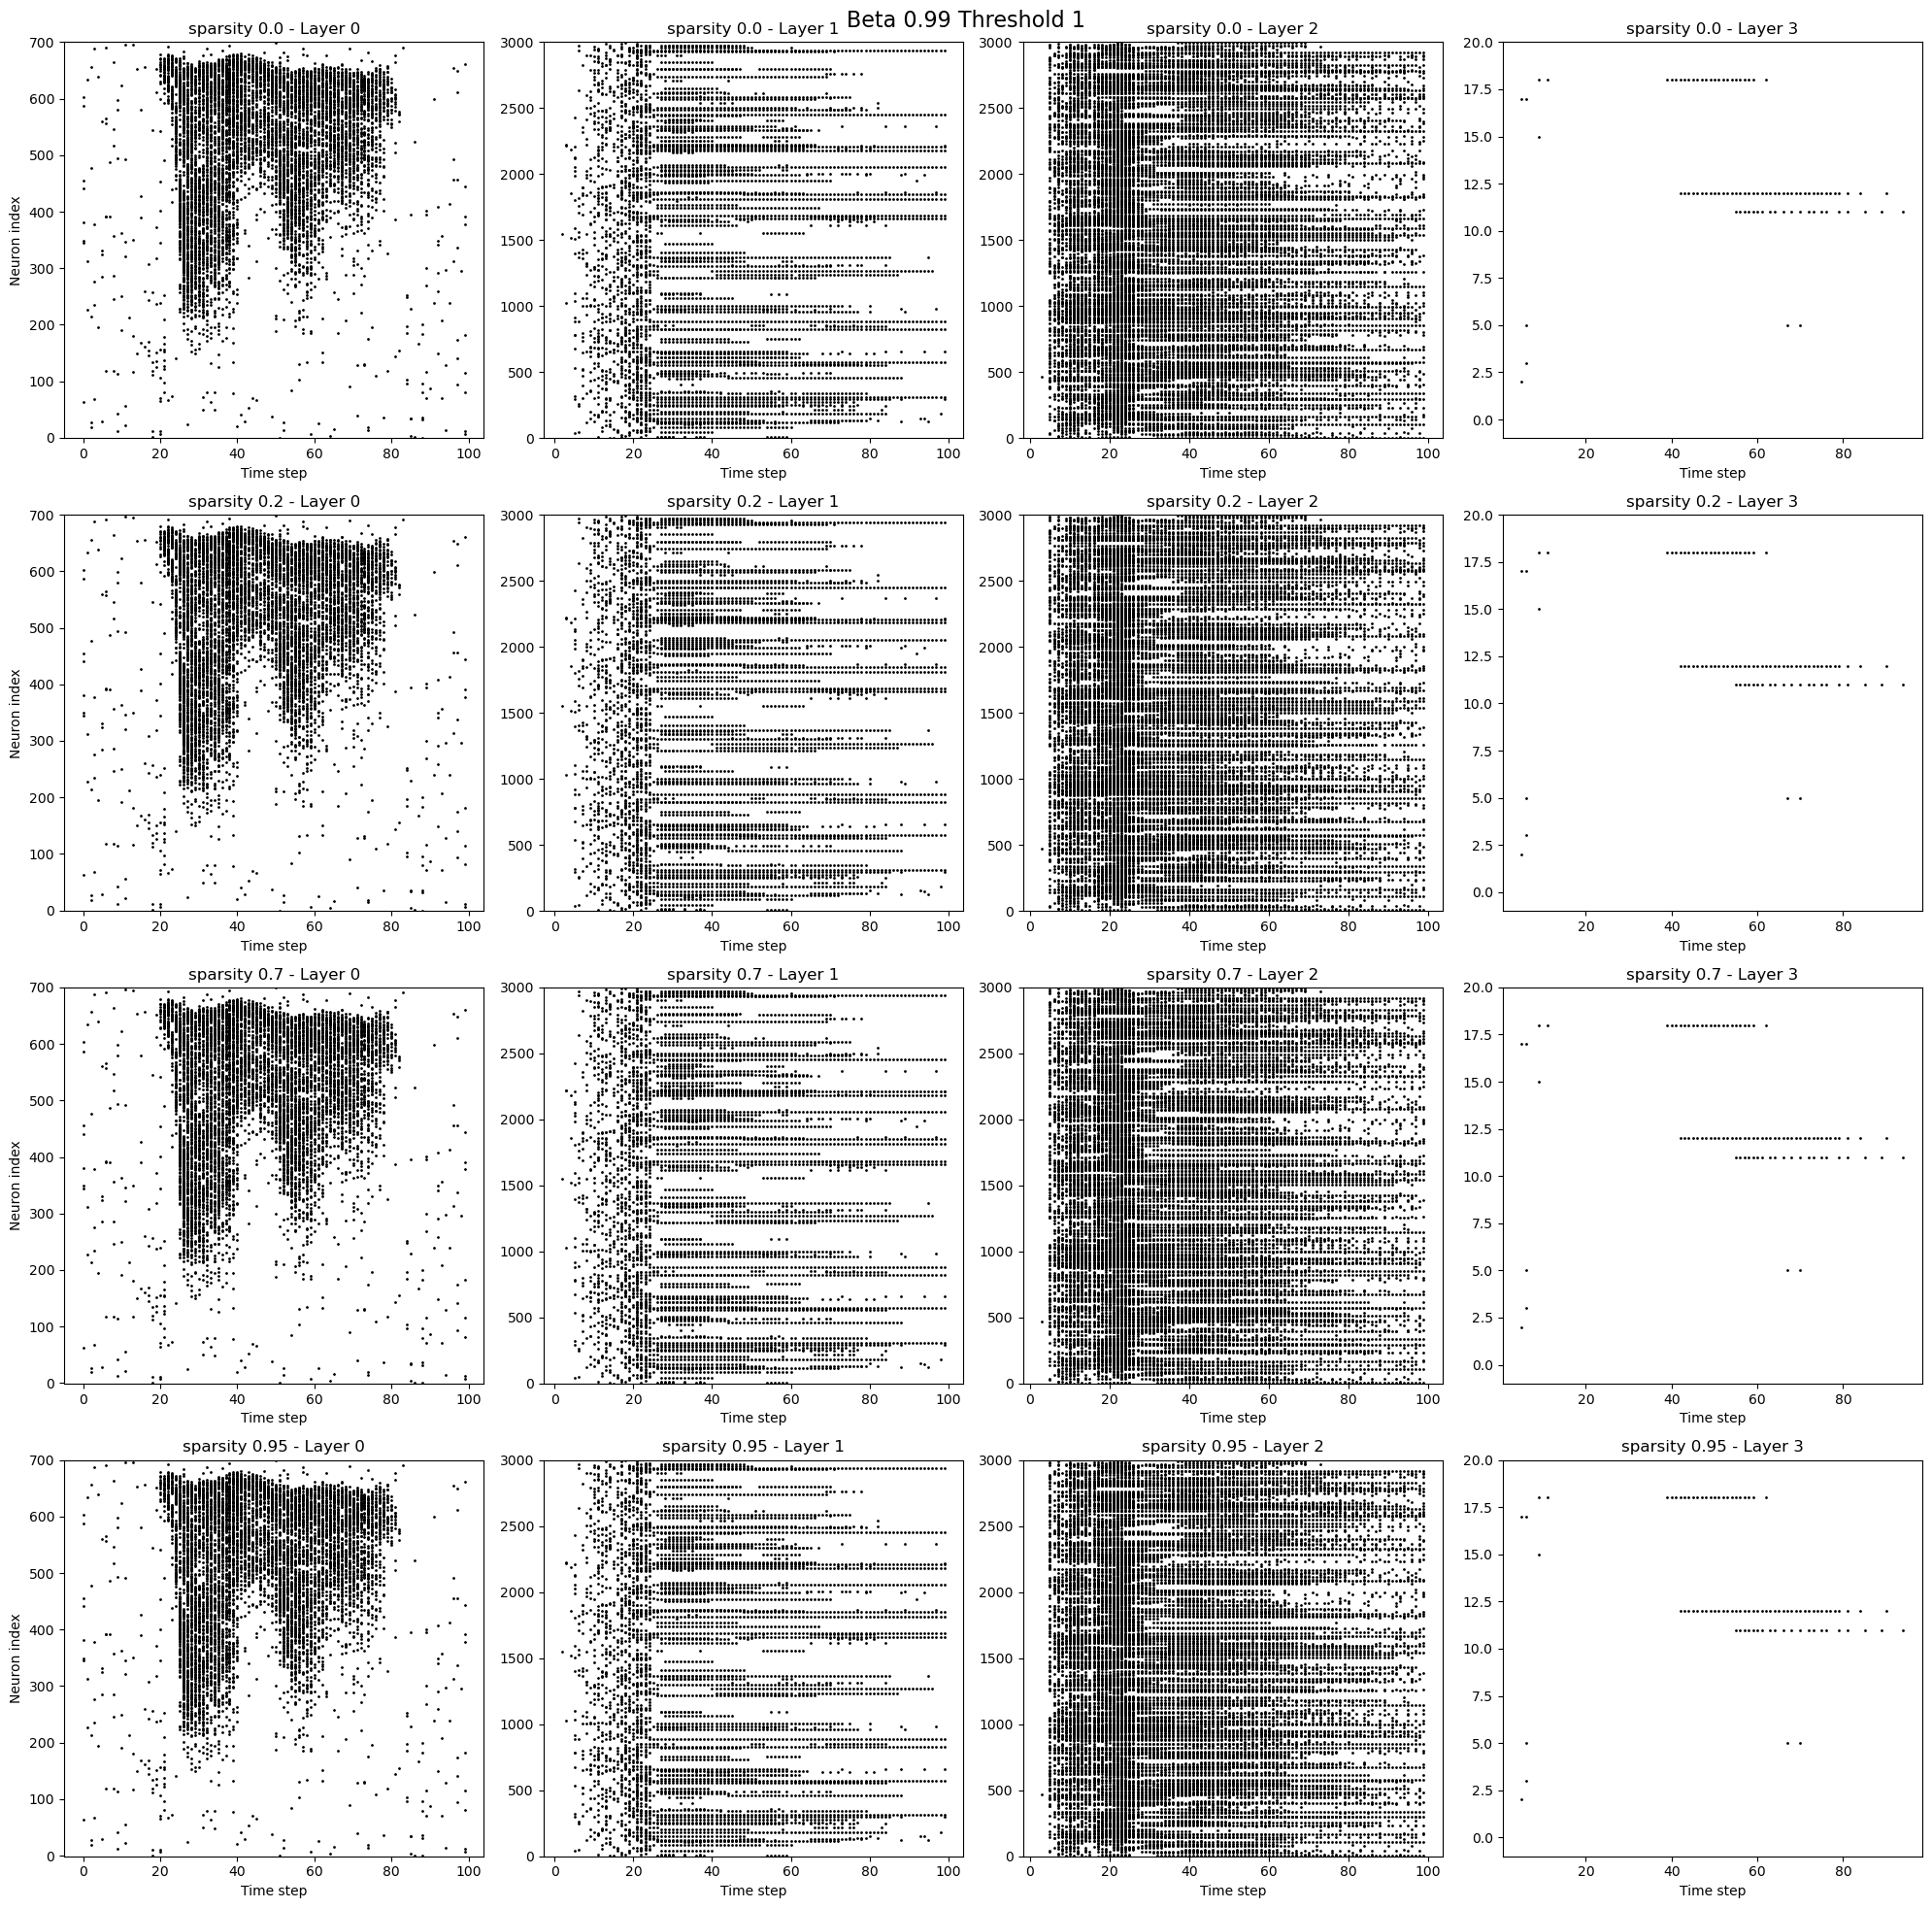

In [ ]:
from neural_nets.configurable_spiking_neural_net import ConfigurableSpikingNeuralNet
from constants import NUMBER_INPUT_NEURONS, NUMBER_OUTPUT_NEURONS, TIME_STEPS
from util.plot_layer_development import plot_layer_development

BEST_NUMBER_HIDDEN_NEURONS = 3000
BEST_NUMBER_HIDDEN_LAYER = 2

nets = []

for sparsity in beta_099_threshold_07["sparsity"]:
    beta = 0.99
    threshold = 0.7
    configured_net =  ConfigurableSpikingNeuralNet(number_input_neurons=NUMBER_INPUT_NEURONS,
                                                 number_hidden_neurons=BEST_NUMBER_HIDDEN_NEURONS,
                                                 number_output_neurons=NUMBER_OUTPUT_NEURONS,
                                                 beta=beta,
                                                 threshold=threshold,
                                                 time_steps=TIME_STEPS,
                                                 number_hidden_layers=BEST_NUMBER_HIDDEN_LAYER)
    
    configured_net.load_state_dict(torch.load(build_model_path(sparsity, beta, threshold)))
    nets.append((beta, threshold, sparsity, configured_net))


models = [model for _,_,_, model in nets]

row_labels = [f'sparsity {sparsity}' for _, _, sparsity, _ in nets]

plot_layer_development(models, data, selection_index, row_labels, "Beta 0.99 Threshold 1")

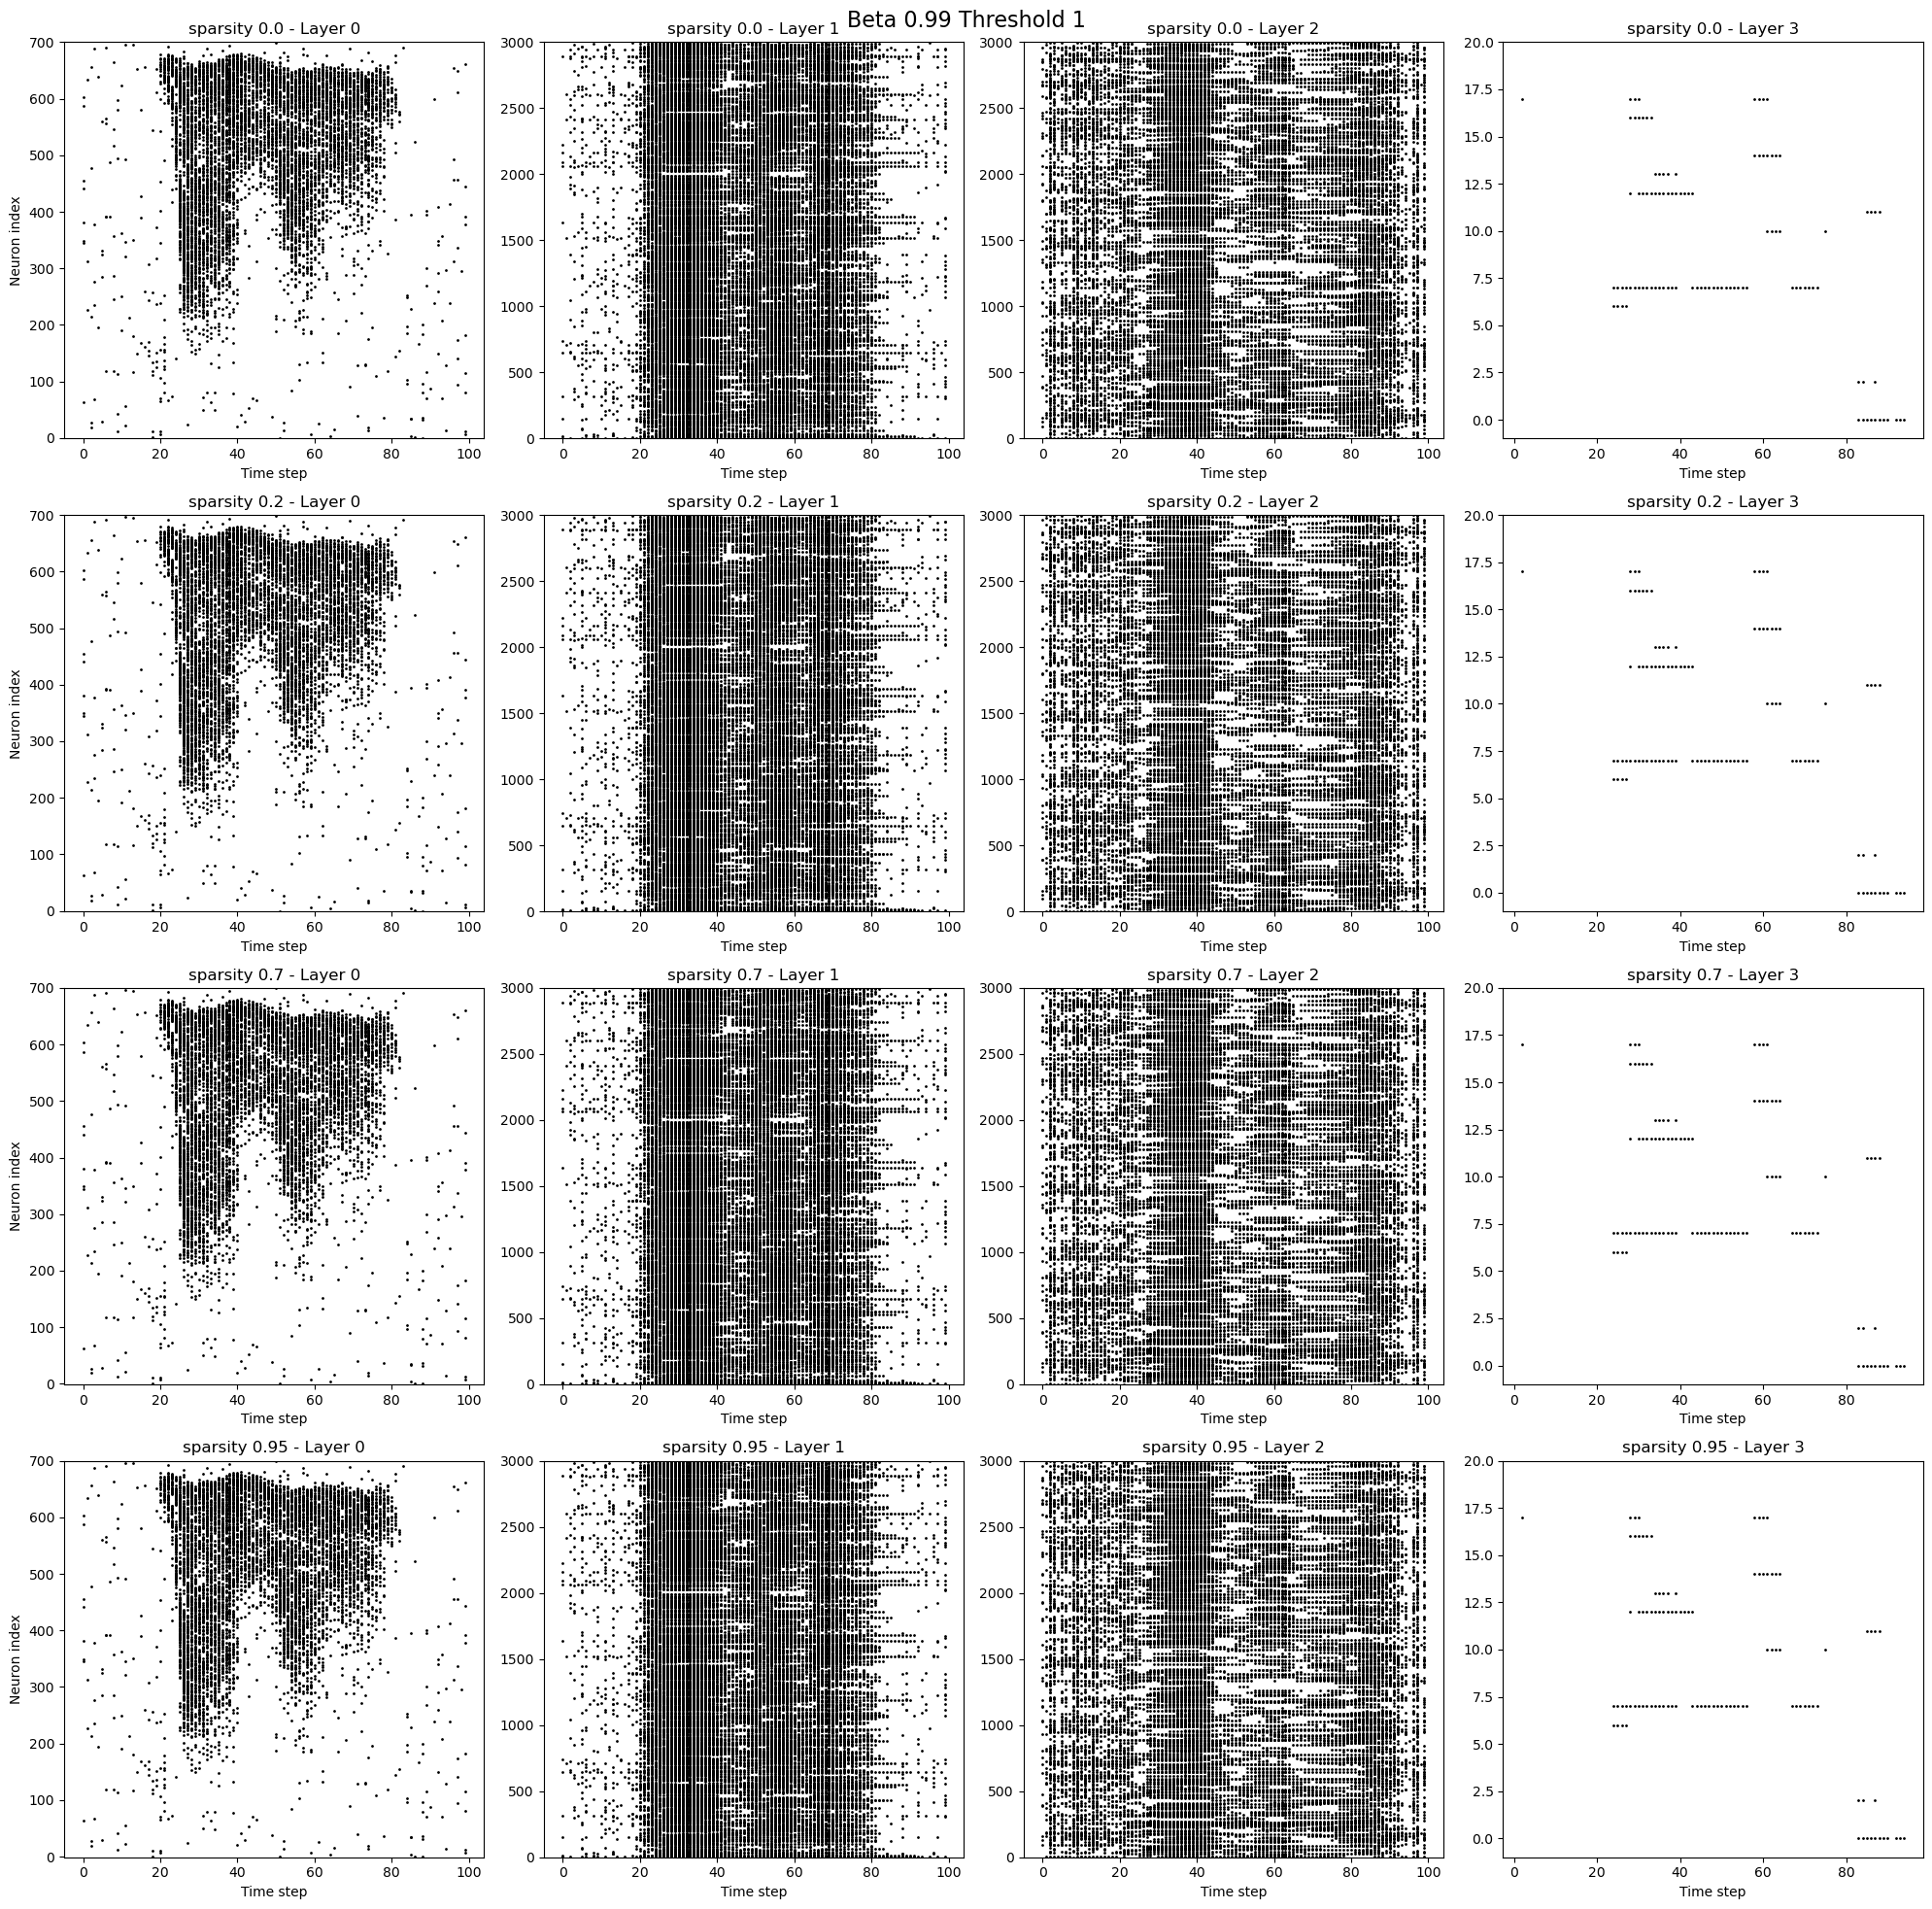

In [ ]:
from neural_nets.configurable_spiking_neural_net import ConfigurableSpikingNeuralNet
from constants import NUMBER_INPUT_NEURONS, NUMBER_OUTPUT_NEURONS, TIME_STEPS
from util.plot_layer_development import plot_layer_development

BEST_NUMBER_HIDDEN_NEURONS = 3000
BEST_NUMBER_HIDDEN_LAYER = 2

nets = []

for sparsity in beta_08_threshold_07["sparsity"]:
    beta = 0.8
    threshold = 0.7
    configured_net =  ConfigurableSpikingNeuralNet(number_input_neurons=NUMBER_INPUT_NEURONS,
                                                 number_hidden_neurons=BEST_NUMBER_HIDDEN_NEURONS,
                                                 number_output_neurons=NUMBER_OUTPUT_NEURONS,
                                                 beta=beta,
                                                 threshold=threshold,
                                                 time_steps=TIME_STEPS,
                                                 number_hidden_layers=BEST_NUMBER_HIDDEN_LAYER)
    
    configured_net.load_state_dict(torch.load(build_model_path(sparsity, beta, threshold)))
    nets.append((beta, threshold, sparsity, configured_net))


models = [model for _,_,_, model in nets]

row_labels = [f'sparsity {sparsity}' for _, _, sparsity, _ in nets]

plot_layer_development(models, data, selection_index, row_labels, "Beta 0.99 Threshold 1")

In [ ]:
beta_05_threshold_3 = original_df[(original_df["beta"] == 0.5) | (original_df["threshold"] == 3)]

beta_05_threshold_3

,epochs,training_accuracy,test_accuracy,time,num_hidden_layer,num_hidden_neurons,sparsity,beta,threshold
2,6,0.455248,39.796820,5581.846544,2,3000,0.0,0.99,3.0
11,18,0.970329,56.227915,8095.335637,2,3000,0.0,0.50,0.7
16,25,0.874571,57.906360,11138.702326,2,3000,0.0,0.80,3.0
20,8,0.309465,22.482332,3850.559719,2,3000,0.0,0.50,3.0
21,20,0.961869,55.256184,8956.519206,2,3000,0.0,0.50,1.0


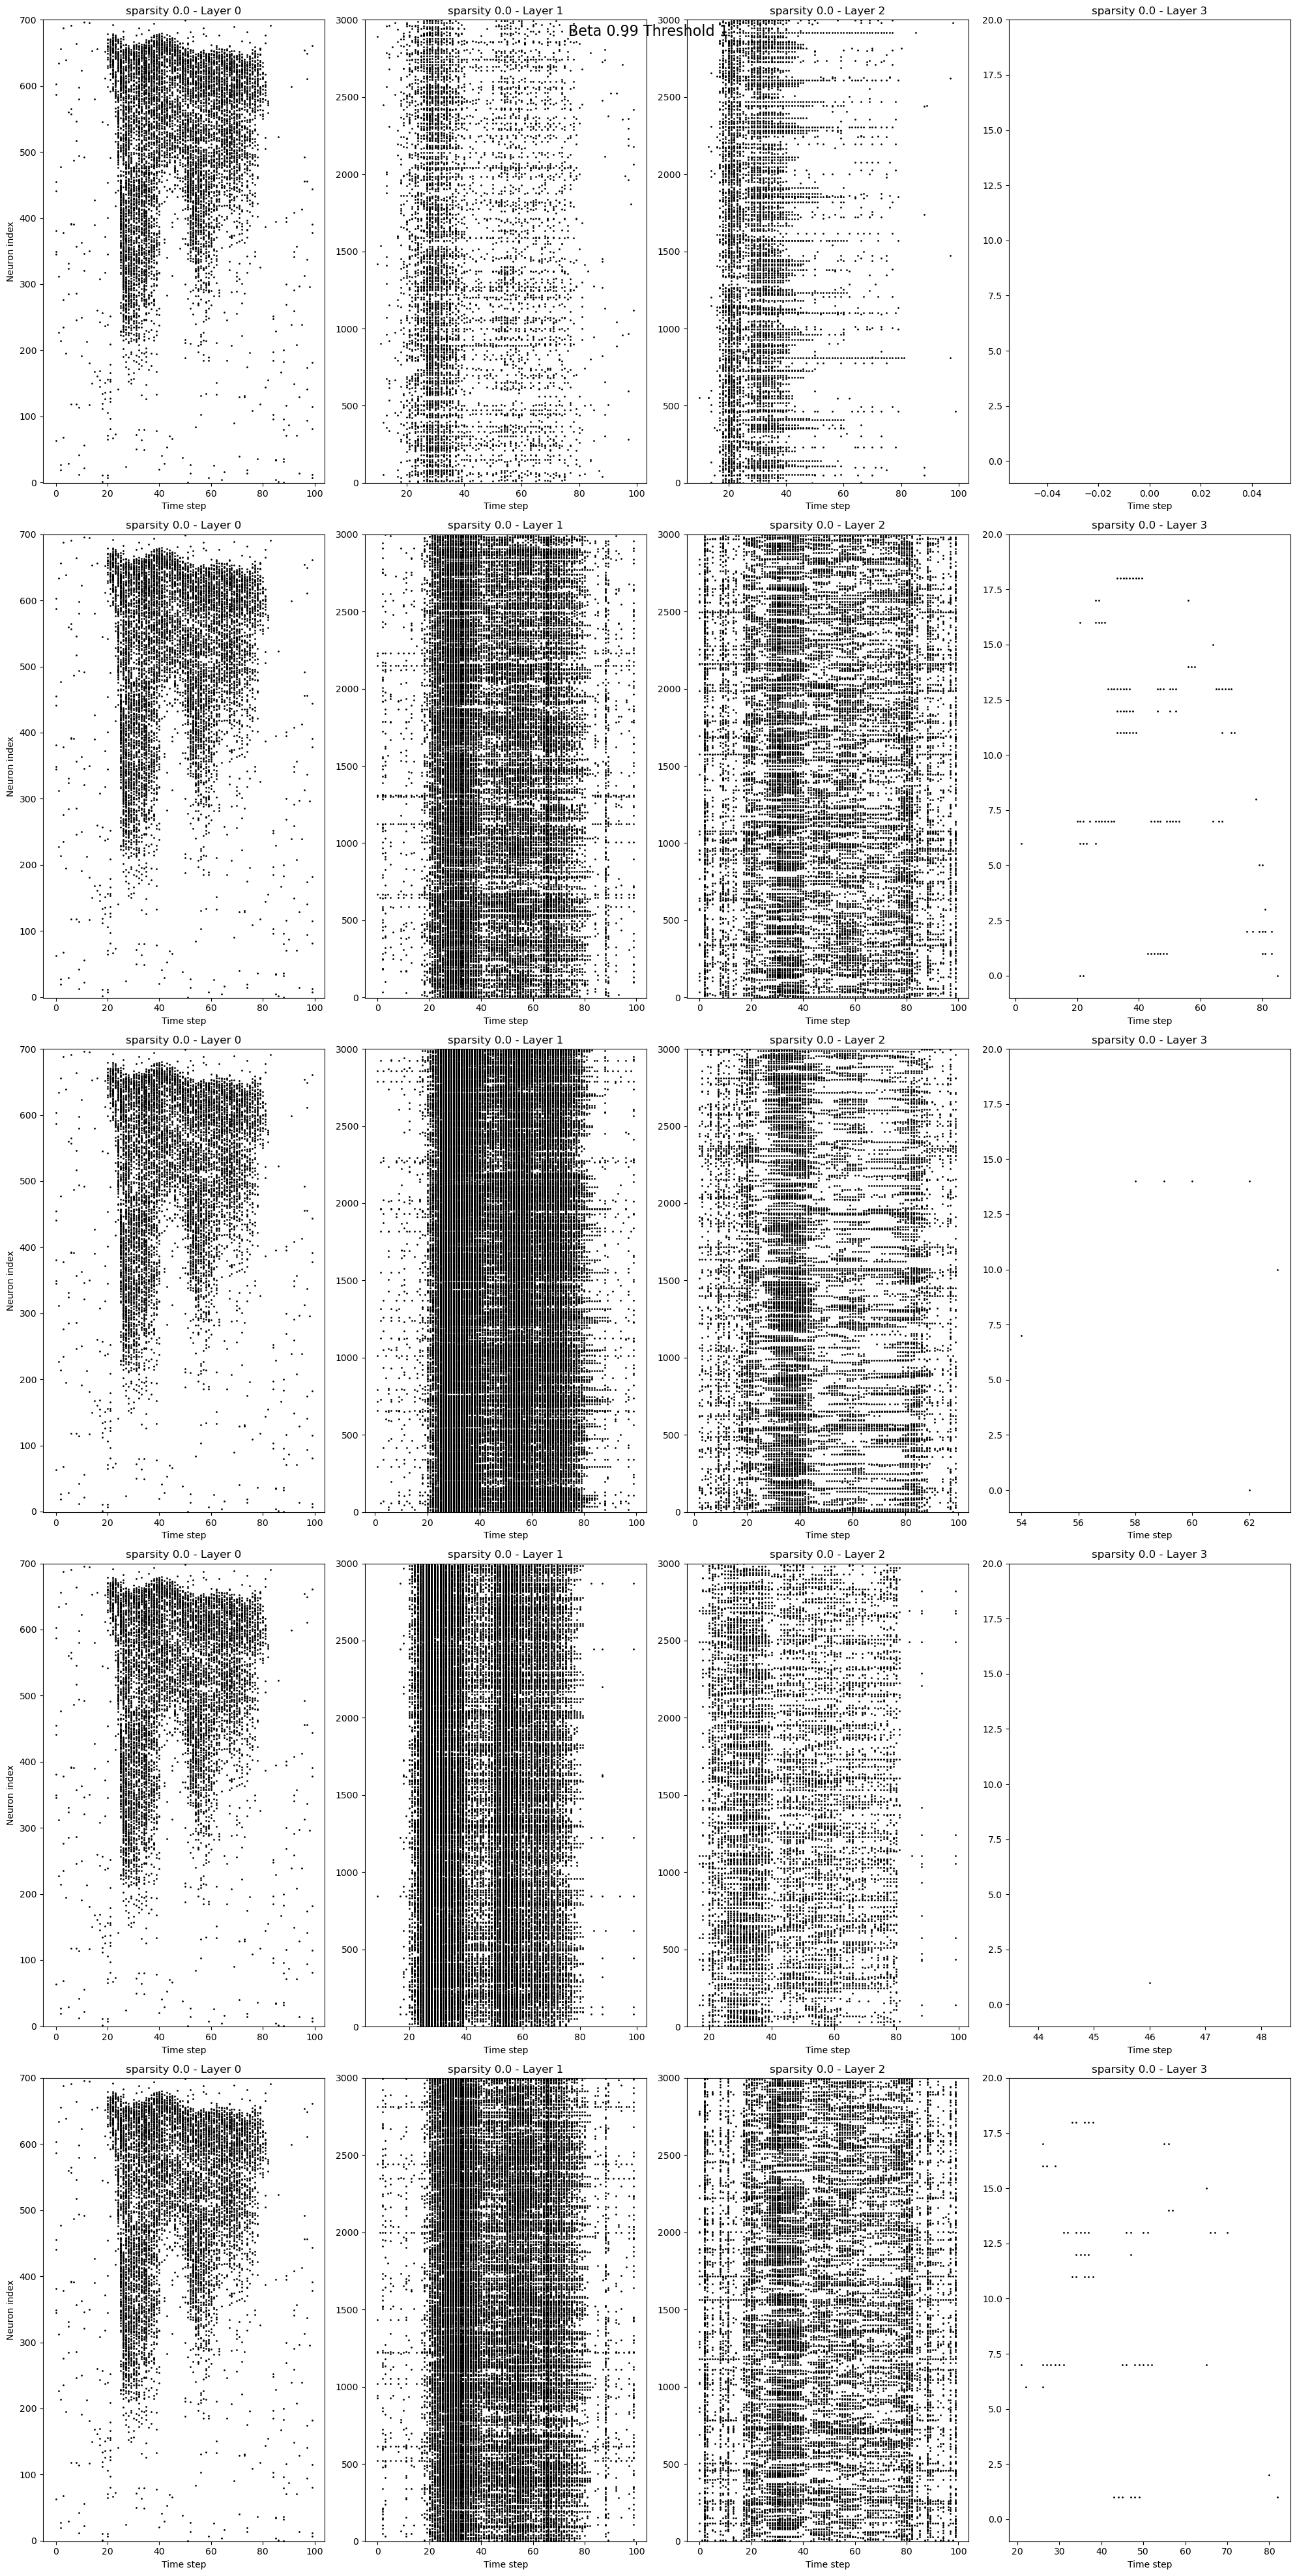

In [ ]:
from neural_nets.configurable_spiking_neural_net import ConfigurableSpikingNeuralNet
from constants import NUMBER_INPUT_NEURONS, NUMBER_OUTPUT_NEURONS, TIME_STEPS
from util.plot_layer_development import plot_layer_development

BEST_NUMBER_HIDDEN_NEURONS = 3000
BEST_NUMBER_HIDDEN_LAYER = 2

nets = []

for sparsity, beta, threshold in beta_05_threshold_3[["sparsity", "beta", "threshold"]].to_numpy():
    configured_net =  ConfigurableSpikingNeuralNet(number_input_neurons=NUMBER_INPUT_NEURONS,
                                                 number_hidden_neurons=BEST_NUMBER_HIDDEN_NEURONS,
                                                 number_output_neurons=NUMBER_OUTPUT_NEURONS,
                                                 beta=beta,
                                                 threshold=threshold,
                                                 time_steps=TIME_STEPS,
                                                 number_hidden_layers=BEST_NUMBER_HIDDEN_LAYER)
    
    configured_net.load_state_dict(torch.load(build_model_path(sparsity, beta, threshold)))
    nets.append((beta, threshold, sparsity, configured_net))


models = [model for _,_,_, model in nets]

row_labels = [f'sparsity {sparsity}' for _, _, sparsity, _ in nets]

plot_layer_development(models, data, selection_index, row_labels, "Beta 0.99 Threshold 1")

In [ ]:
from util.plot_layer_development import plot_layer_development

models = [
    atan_model,
    spike_rate_escape_model
]

plot_layer_development(models, data, selection_index, ["ATan", "Spike Rate Escape"], "Different Surrogates", figsize=(20, 12))

NameError: name 'atan_model' is not defined

In [ ]:
def get_spk_matrices(data, model, selection_index):
    spk_recs, _ = model(data)

    output_spk_rec = spk_recs[-1][:, selection_index, :]
    hidden_spk_rec = [hidden_spk_rec[:, selection_index, :].detach() for hidden_spk_rec in spk_recs[:-1]]

    return [x_selected, *hidden_spk_rec, output_spk_rec.detach()]

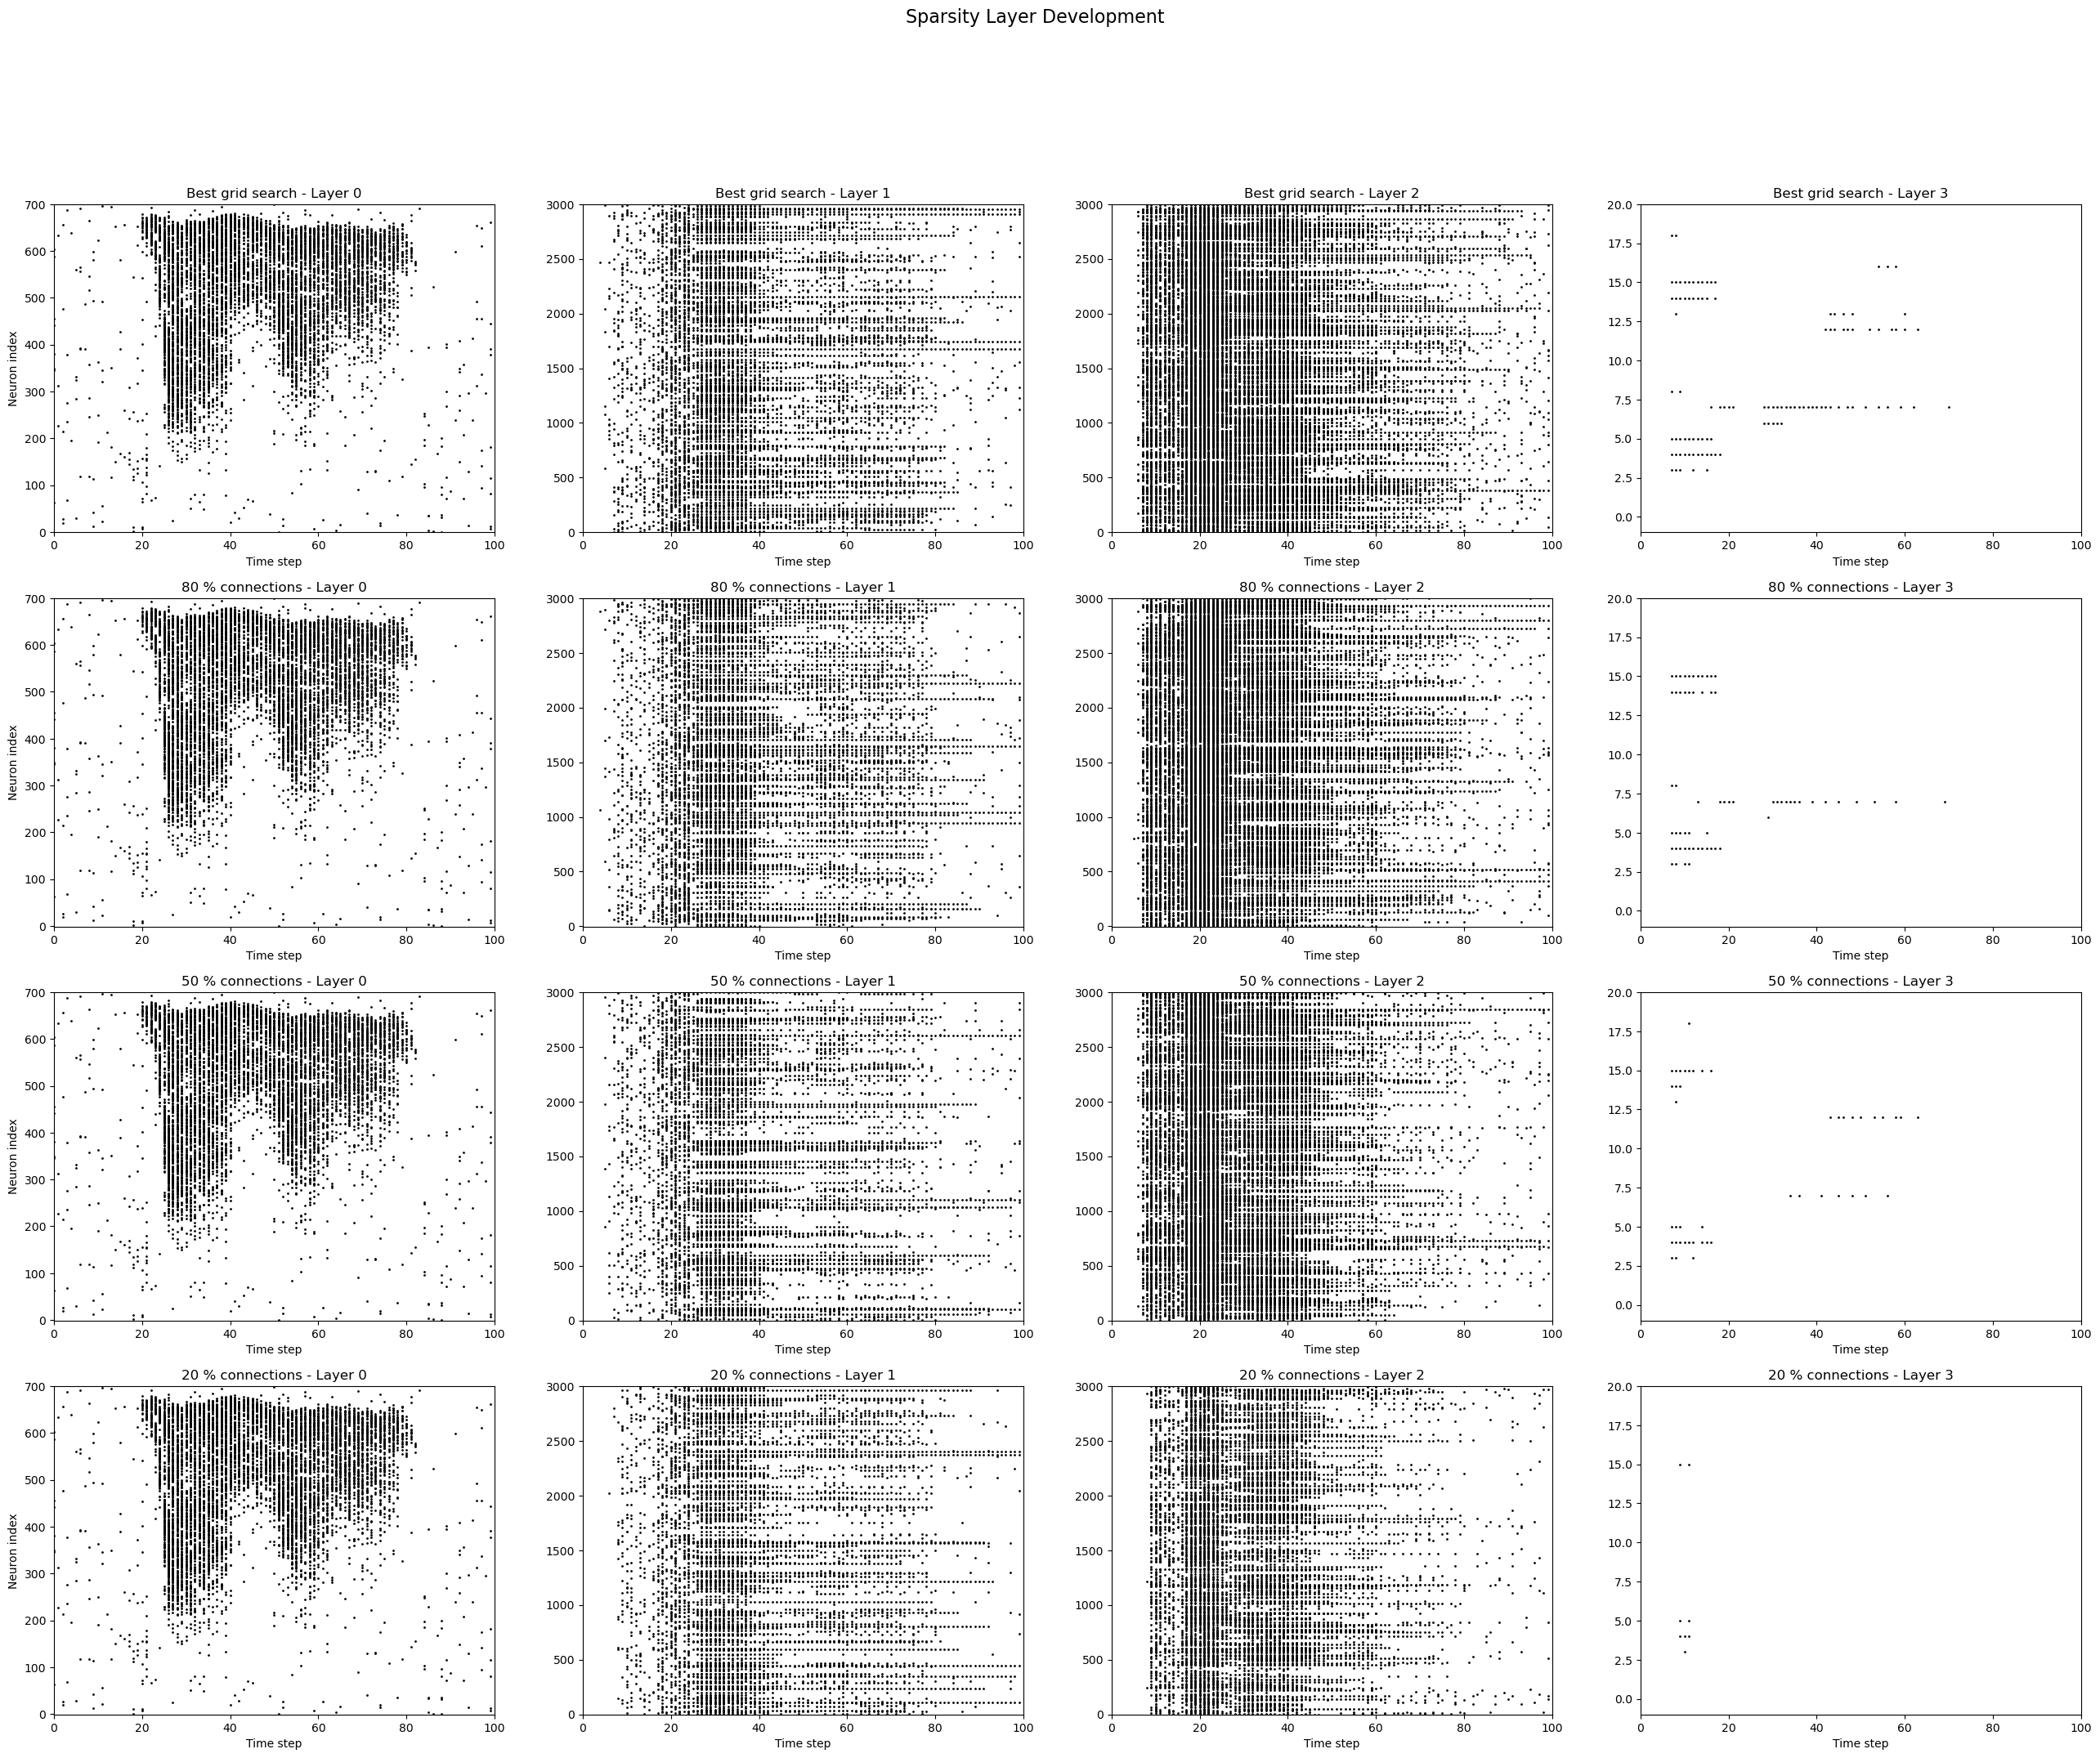

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

spike_matrices_best_grid_search = get_spk_matrices(data, best_grid_search_model, selection_index)
spike_matrices_best_grid_search_80_percent = get_spk_matrices(data, best_grid_search_model_80_percent_of_connections, selection_index)
spike_matrices_best_grid_search_50_percent = get_spk_matrices(data, best_grid_search_model_50_percent_of_connections, selection_index)
spike_matrices_best_grid_search_20_percent = get_spk_matrices(data, best_grid_search_model_20_percent_of_connections, selection_index)
spike_matrices_best_grid_search_5_percent = get_spk_matrices(data, best_grid_search_model_5_percent_of_connections, selection_index)

fig, axes = plt.subplots(4, len(spike_matrices_best_grid_search), figsize=(40, 32))

fig.suptitle("Sparsity Layer Development", fontsize=16)

for index in range(len(spike_matrices_best_grid_search)):
    spike_matrix_np = spike_matrices_best_grid_search[index].numpy()
    times, neurons = np.where(spike_matrix_np == 1)
    ax = axes[0, index]
    ax.scatter(times, neurons, s=1, color='black')
    ax.set_title(f"Best grid search - Layer {index}")
    ax.set_xlabel("Time step")
    ax.set_ylim(-1, spike_matrix_np.shape[1])
    ax.set_xlim(0, 100)
    if index == 0:
        ax.set_ylabel("Neuron index")

    spike_matrix_np = spike_matrices_best_grid_search_80_percent[index].numpy()
    times, neurons = np.where(spike_matrix_np == 1)
    ax = axes[1, index]
    ax.scatter(times, neurons, s=1, color='black')
    ax.set_title(f"80 % connections - Layer {index}")
    ax.set_xlabel("Time step")
    ax.set_ylim(-1, spike_matrix_np.shape[1])
    ax.set_xlim(0, 100)
    if index == 0:
        ax.set_ylabel("Neuron index")

    spike_matrix_np = spike_matrices_best_grid_search_50_percent[index].numpy()
    times, neurons = np.where(spike_matrix_np == 1)
    ax = axes[2, index]
    ax.scatter(times, neurons, s=1, color='black')
    ax.set_title(f"50 % connections - Layer {index}")
    ax.set_xlabel("Time step")
    ax.set_ylim(-1, spike_matrix_np.shape[1])
    ax.set_xlim(0, 100)
    if index == 0:
        ax.set_ylabel("Neuron index")

    spike_matrix_np = spike_matrices_best_grid_search_20_percent[index].numpy()
    times, neurons = np.where(spike_matrix_np == 1)
    ax = axes[3, index]
    ax.scatter(times, neurons, s=1, color='black')
    ax.set_title(f"20 % connections - Layer {index}")
    ax.set_xlabel("Time step")
    ax.set_ylim(-1, spike_matrix_np.shape[1])
    ax.set_xlim(0, 100)

    if index == 0:
        ax.set_ylabel("Neuron index")

    spike_matrix_np = spike_matrices_best_grid_search_5_percent[index].numpy()
    times, neurons = np.where(spike_matrix_np == 1)
    ax = axes[3, index]
    ax.scatter(times, neurons, s=1, color='black')
    ax.set_title(f"5 % connections - Layer {index}")
    ax.set_xlabel("Time step")
    ax.set_ylim(-1, spike_matrix_np.shape[1])
    ax.set_xlim(0, 100)

    if index == 0:
        ax.set_ylabel("Neuron index")